### Arboles 
A grandes rasgos los árboles de clasificación son métodos que particionan el espacio de covariables $\mathcal{X}$ en piezas disjuntas y entonces clasificamos las observaciones de acuerdo a la partición a la que pertencen.

Supongamos que se tinen dos categorias  $y\in \mathcal{Y}=\{0,1\}$. Y tenemos solamente una covariable $X$. Escogemos un punto t que divide a la recta real en dos conjunto $A_1=(-\infty,t]$, $A_2=(t,\infty)$. Sea $\hat{p}_s(j)$ la proporción de observaciones en $A_s$, tal que $Y_i=j$. 
$$
\hat{p}_s(j)=\dfrac{\sum_{i=1}^n I(Y_i=j,X_i\in A_s)}{\sum_{i=1}^n I(X_i\in A_s)}
$$
para $s=1,2$ y $j=0,1$.

Ejemplo: Proporción de observaciones en $A_1$ tal que Y=0.
$$
\hat{p}_1(j=0)=\dfrac{\sum_{i=1}^n I(Y_i=0,X_i\in A_1)}{\sum_{i=1}^n I(X_i\in A_1)}
$$

La impureza del split se define como, 
$$
I(t)=\sum_{s=1}^2\gamma_s
$$
donde $\gamma_s=1-\sum_{j=0}^1 \hat{p}_s(j)^2$.
Esta es una medida de la impureza y se le conoce como indice de $\textbf{Gini}$. Si una partición $A_s$ contiene todos los 0's o 1's entonces $\gamma_s=0$. De otra manera $\gamma_s>0$ Entonces nosotros tratamos de escoger un punto $t$ tal que minimize la impureza.



Ventajas

* Fácil de interpretar.
* No paramétrico

Deventajas 

* Sobreajuste
* Pérdida de información al categorizar variables continuas
* Precisión: si pueden usar mejor SVM, usenlos! en ocaciones tienen tasas de error más bajas hasta 30 %  
* Inestabilidad: un pequeño cambio en los datos puede modificar ampliamente la estructura del árbol
* hay que tener cuidado con la heurística 

In [2]:
import os 
#agregar al path el lugar de la instalacion de graphviz (dot.exe)
#os.environ["PATH"] += os.pathsep + r'C:\Users\jimmy\Anaconda3\Library\bin\graphviz'

In [4]:
import urllib.request          as     url
import pandas                  as     pd
from   sklearn                 import tree
import graphviz                as     gv
import numpy                   as     np
from   sklearn.metrics         import accuracy_score
from   sklearn.model_selection import train_test_split
from   sklearn.ensemble        import BaggingClassifier,RandomForestClassifier
import matplotlib.pylab        as     plt 
from   sklearn.model_selection import GridSearchCV
import sklearn

#### Descripción de los datos
Los datos del Estudio de factores de riesgo coronario (CORIS) incluyen a 462 hombres de entre 15 y 64 años de tres zonas rurales de Sudáfrica (Rousseauw et al. (1983)). La variable de respuesta Y es la presencia (Y = 1) o ausencia (Y = 0) de enfermedad coronaria. Hay 9 covariables:

* sbp- presión arterial sistólica
* tobacco tabaquismo acumulado (kg)
* ldl (colesterol unido a lipoproteínas de baja densidad)
* adiposity, adiposidad
* famhist (antecedentes familiares de enfermedad cardíaca)
* tipoa (comportamiento tipo A), 
* obesity, obesidad 
* alcohol (consumo actual de alcohol) 
* age

In [5]:
data=pd.read_csv('coris.csv',sep=',',header=0)
data.shape
data.head(2)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1


In [6]:
print('Personas con enferdad de las coronarias')
print(pd.value_counts(data['chd']))
print('Personas con edad menor de 50 años')
print(sum([1 for i in data['age'] if i<=50]))

Personas con enferdad de las coronarias
0    302
1    160
Name: chd, dtype: int64
Personas con edad menor de 50 años
290


Parametros
1. $\textit{max_leaf_nodes}$ es el maximo número de nodos hojas (nodos sin hijos) para reducción relativa de la impureza
2. $\textit{max_depth}$ profundidad maxima.
3. $\textit{criterion}$ criterio para la división de los datos, Gini (impureza)
El indice de Gini es un valor entre 0 y 1

In [7]:
y=data.pop("chd")
X=data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [8]:
print('Personas con enferdad de las coronarias')
print(pd.value_counts(y_train))
print('Personas con edad menor de 50 años')
print(sum([1 for i in X_train['age'] if i<50]))

Personas con enferdad de las coronarias
0    212
1    111
Name: chd, dtype: int64
Personas con edad menor de 50 años
194


In [9]:
#ccp_alpha= 0.015 agregar para mejorar la clasificacion
tr=tree.DecisionTreeClassifier(criterion="gini",max_depth=7,max_leaf_nodes=7)
trf=tr.fit(X_train,y_train)

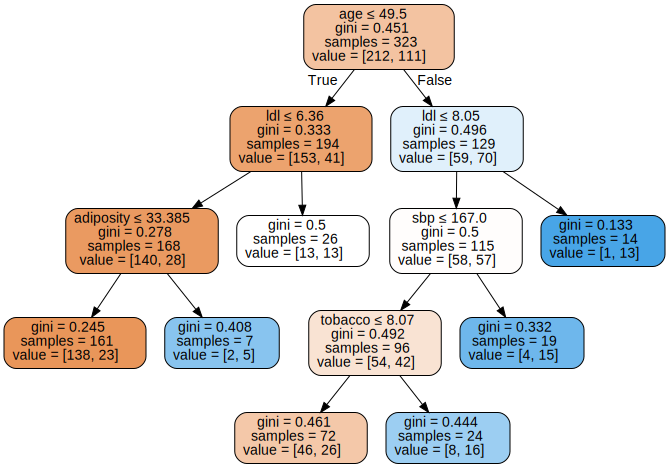

In [10]:
dot_data = tree.export_graphviz(trf, out_file=None,
                     feature_names=X_train.columns,  
                     
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = gv.Source(dot_data)  
graph 

In [65]:
yp=trf.predict(X_test)
print('Porcentaje de datos bien clasificados')
print(accuracy_score(y_test,yp))
print('número de datos bien clasificados')
accuracy_score(y_test,yp,normalize=False)

Porcentaje de datos bien clasificados
0.697841726618705
número de datos bien clasificados


97

In [55]:
param_grid = {
    'max_depth' : [4,5,6,7,8,9,10,11],
    'max_leaf_nodes' : [i for i in range(5,25,1)],
    'criterion':["gini", "entropy"]
}
model = GridSearchCV(tree.DecisionTreeClassifier(),param_grid, scoring = 'accuracy')
model.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.016,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'c

In [63]:
print("model score: %.3f" % model.score(X_test, y_test))
print ("hiperparametros: ",str(model.best_params_))

model score: 0.626
hiperparametros:  {'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 5}


La poda de costo mínimo y complejidad es un algoritmo que se utiliza para podar un árbol para evitar un ajuste excesivo. Este algoritmo es parametrizado por $\alpha\geq 0$ conocido como parámetro de complejidad. El parámetro de complejidad se utiliza para definir la medida de costo-complejidad, $R_\alpha(T)$, de un árbol $T$ dado por:
$$
R_\alpha(T)=R(T)+\alpha |T|
$$
donde $|T|$ es el número de nodos terminales en $T$ y se define tradicionalmente como la tasa total de clasificación errónea de los nodos terminales.
DecisionTreeClassifier proporciona parámetros como $\textit{min_samples_leaf}$ y $\textit{max_depth}$ para evitar que un árbol se sobreajuste. La poda de costo complejidad proporciona otra opción para controlar el tamaño de un árbol. En DecisionTreeClassifier, esta técnica de poda está parametrizada por el parámetro de complejidad de costo, $\textit{ccp_alpha}$.

In [41]:
path = tr.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Impureza vs effective alpha')

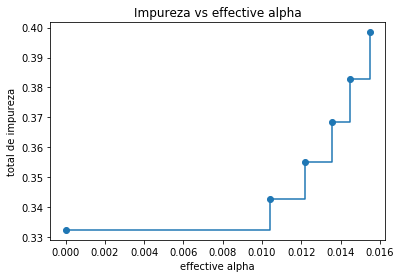

In [43]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total de impureza")
ax.set_title("Impureza vs effective alpha")

In [47]:
models = []
for ccp_alpha in ccp_alphas:
    mod = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    mod.fit(X_train, y_train)
    models.append(mod)
print("Numero de nodos en el ultimo arbol es: {} con ccp_alpha: {}".format(
      models[-1].tree_.node_count, ccp_alphas[-1]))

Numero de nodos en el ultmo arbol es: 3 con ccp_alpha: 0.052655936481275034


In [48]:
models = models[:-1]
ccp_alphas = ccp_alphas[:-1]

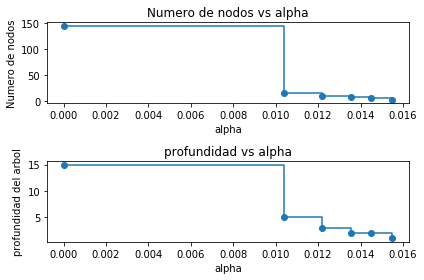

In [50]:
node_counts = [mod.tree_.node_count for mod in models]
depth = [mod.tree_.max_depth for mod in models]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("Numero de nodos")
ax[0].set_title("Numero de nodos vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("profundidad del arbol")
ax[1].set_title("profundidad vs alpha")
fig.tight_layout()

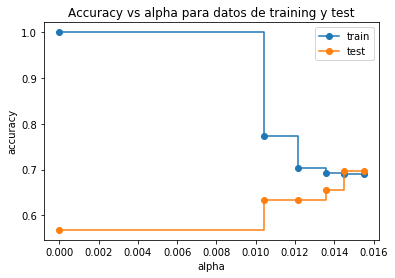

In [69]:
train_scores = [mod.score(X_train, y_train) for mod in models]
test_scores = [mod.score(X_test, y_test) for mod in models]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha para datos de training y test")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

Ojo: Scikit-Learn usa una versión optimizada del algoritmo CART el cual es un algoritmo muy similar a C4.5, sin embargo esta implementación no soporta variables categoricas por ahora.

In [71]:
randomForest = RandomForestClassifier(max_depth=7,n_estimators=100, random_state=0)
randomForest.fit(X_train, y_train)
y_forest=randomForest.predict(X_test)

In [74]:
print('número de datos bien clasificados')
accuracy_score(y_test,y_forest,normalize=False)

número de datos bien clasificados


96